# Práctica 7: 

Elaboró: Carlos Alejandro Jarero Gonzalez <al255813@alumnos.uacj.mx>

Matrícula: 255813

El presente Notebook fue relizado en equipo local con Kernel Python 3.11.8 en VS Code.


## Objetivos

- El objetivo de este ejercicio es que los estudiantes aprendan a cargar y explorar un dataset, y luego utilicen matplotlib para crear gráficos visuales que les permitan analizar e interpretar los datos.

## Dataset:
Para este ejercicio, utilizaremos el famoso dataset Iris de la librería seaborn. Este dataset contiene información sobre diferentes especies de flores Iris y varias medidas de sus características (como el largo y ancho del sépalo y el pétalo).

Los estudiantes pueden cargarlo directamente desde la librería seaborn. Para ello emplea la siguiente instrucción:

```python
df = sns.load_dataset('iris')
```

## Instrucciones

- Carga y exploración del dataset:
    - Cargar el dataset Iris utilizando seaborn o cualquier otro dataset de su elección.

In [236]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df = sns.load_dataset('iris')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- Verificar las primeras filas del dataset con el método ```.head()```.

In [237]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Obtener información general sobre los datos (nombres de columnas, tipos de datos, valores nulos, etc.).

In [238]:
columns = df.columns
columns_types = df.dtypes 
columns_nulls = df.isnull().sum() # Alias of isnan, is prefered isna
columns_na = df.isna().sum()

df_meta = pd.DataFrame([columns_types, columns_nulls, columns_na]
                       ,columns=columns,
                       index=['Data Type', 'Nulls (alias isna)', 'Nan\'s'])

df_meta

,sepal_length,sepal_width,petal_length,petal_width,species
Data Type,float64,float64,float64,float64,object
Nulls (alias isna),0,0,0,0,0
Nan's,0,0,0,0,0


In [239]:
print("\nDescriptivos")
df.describe()


Descriptivos


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Crear los siguientes gráficos con Matplotlib:

    - Gráfico de barras:

        - Objetivo: Comparar el promedio de largo y ancho de los pétalos entre las tres especies de Iris.

        - Instrucciones: Utiliza un gráfico de barras para mostrar la media de las columnas petal_length y petal_width agrupadas por species.


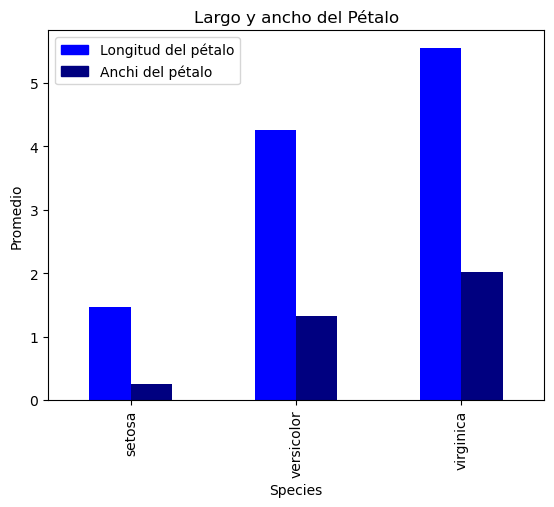

In [240]:
by_species = df.groupby('species')[['petal_length','petal_width']].mean()

by_species_bars = by_species.plot(kind='bar', color=["blue", "navy"]
                , xlabel="Species", ylabel="Promedio"
                , title="Largo y ancho del Pétalo"
                )
                
petal_length = Patch(color='blue', label='Longitud del pétalo')
petal_width  = Patch(color='navy', label='Anchi del pétalo')
plt.legend(handles=[petal_length, petal_width])
plt.show()

- Histograma:

  - Objetivo: Visualizar la distribución de los largos de los sépalos (sepal_length).
  - Instrucciones: Crea un histograma de la variable sepal_length y asegúrate de que tenga un número adecuado de bins. Coloca etiquetas en los ejes y un título.





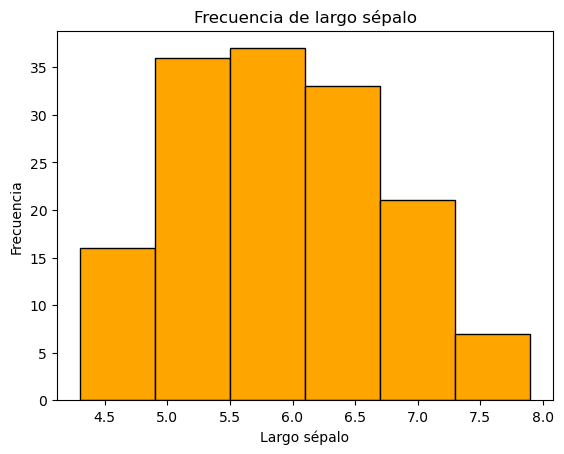

In [241]:
plt.hist(df['sepal_length'], bins=6, edgecolor='black', color='orange')

plt.ylabel("Frecuencia")
plt.xlabel("Largo sépalo")
plt.title("Frecuencia de largo sépalo")

plt.show()

- Gráfico de dispersión (scatter plot):

    - Objetivo: Relacionar el largo del pétalo con el ancho del pétalo.

    - Instrucciones: Crea un gráfico de dispersión que compare petal_length con petal_width. Usa un color diferente para cada especie.

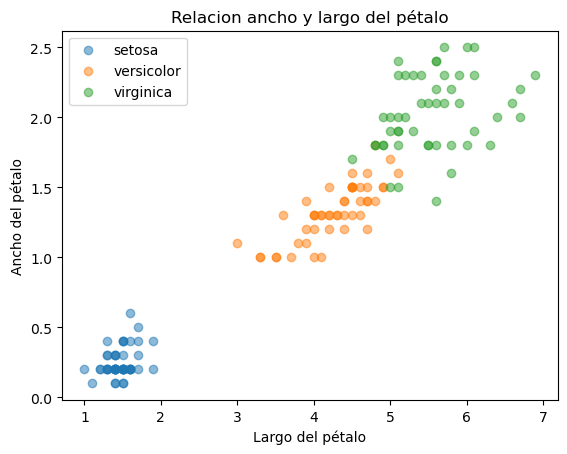

In [242]:
for e in df['species'].unique():
    group = df[df['species'] == e]
    plt.scatter(x=group['petal_length']
                ,y=group['petal_width']
                , alpha=0.5
                , label=e)

plt.ylabel("Ancho del pétalo")
plt.xlabel("Largo del pétalo")
plt.title("Relacion ancho y largo del pétalo")
plt.legend()

plt.show()



- Gráfico de cajas (box plot):

    - Objetivo: Analizar la distribución de las medidas del sépalo (sepal_length, sepal_width).

    - Instrucciones: Crea un gráfico de cajas para mostrar la distribución de las variables sepal_length y sepal_width por especie.

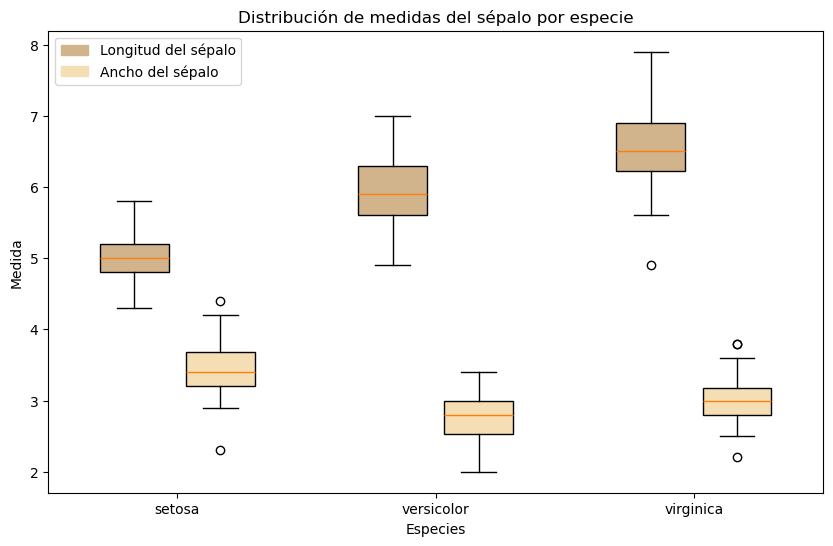

In [243]:
species = df['species'].unique()

sepal_length = [df[df['species'] == sp]['sepal_length'] for sp in species]
sepal_width  = [df[df['species'] == sp]['sepal_width']  for sp in species]

figure, plots = plt.subplots(figsize=(10, 6))

positions_length = []
positions_width = []
pos = 1

for _ in species:
    positions_length.append(pos)
    positions_width.append(pos + 0.5) 
    pos += 1.5

bp_length = plots.boxplot(sepal_length
                          , positions=positions_length
                          , widths=0.4
                          , patch_artist=True)
bp_width = plots.boxplot(sepal_width
                         , positions=positions_width
                         , widths=0.4
                         , patch_artist=True)

for box in bp_length['boxes']:
    box.set_facecolor('tan')
for box in bp_width['boxes']:
    box.set_facecolor('wheat')

x_ticks = []
for pl, pw in zip(positions_length, positions_width):
    x_ticks.append((pl + pw) / 2)

plots.set_xticks(x_ticks)
plots.set_xticklabels(species)
plots.set_xlabel("Especies")
plots.set_ylabel("Medida")
plots.set_title("Distribución de medidas del sépalo por especie")

patch_length = Patch(color='tan', label='Longitud del sépalo')
patch_width  = Patch(color='wheat', label='Ancho del sépalo')
plots.legend(handles=[patch_length, patch_width])

plt.show()